# ML in Python- Supervised Learning Artifical Neural Networks

### 1) Importing Libraries and Setting Path

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier

In [2]:
#Create a path to where your data is stored.
path = r'C:\Users\wjzak\Dropbox\Career Foundry\Data Specialization\Module 1\12-25- ClimateWins Project\Data Sets'

In [3]:
#Read in the Regular weather data.
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


### 2) Preparing Data

In [4]:
# Drop columns starting with 'GDANSK', 'ROMA', or 'TOURS' from climate dataset
climate = climate.drop(columns=[col for col in climate.columns if col.startswith(('GDANSK', 'ROMA', 'TOURS'))])

In [5]:
# Keep only DATE, MONTH, and temperature-related columns in climate
temp_cols = [col for col in climate.columns if 'temp' in col]
climate = climate[['DATE', 'MONTH'] + temp_cols]

In [6]:
#Read in the Pleasant weather data.
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
### Create an 'X' matrix by dropping the unneeded columns
X = climate.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'], axis=1)

In [8]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [9]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [11]:
X_train

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,20.4,13.6,26.9,22.5,16.2,28.6,22.5,18.6,27.1,16.3,...,16.5,2.3,0.8,3.8,8.5,5.0,11.9,15.6,13.7,17.6
20472,-1.8,-3.2,-0.5,-3.6,-6.0,0.1,-3.3,-7.2,-0.2,-2.5,...,-8.2,-17.4,-19.2,-15.6,-6.9,-9.4,-4.6,10.7,7.9,13.5
18269,-1.8,-6.0,0.7,3.2,1.6,6.7,-0.4,-1.3,1.0,-4.9,...,-11.7,-14.1,-15.5,-12.7,-8.3,-13.3,-5.5,1.0,-3.9,5.9
7713,-1.4,-3.8,2.1,0.7,0.3,2.5,1.5,-0.2,4.0,0.2,...,-2.9,-20.9,-22.4,-19.4,-2.2,-5.2,-1.5,6.8,5.5,9.6
21958,6.1,1.8,13.5,6.7,1.7,11.7,6.2,2.6,10.8,5.7,...,5.3,-14.7,-16.6,-12.7,1.0,-0.6,3.5,10.7,7.9,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,13.3,12.1,16.0,16.7,10.9,22.3,14.1,10.6,18.1,12.1,...,12.0,-2.6,-3.5,-1.6,7.7,4.0,10.1,11.6,10.0,13.3
21575,1.0,-0.9,3.2,-2.4,-3.5,-1.3,-0.4,-3.4,3.0,7.2,...,-2.9,-13.8,-18.7,-8.9,-4.9,-6.6,-1.9,10.7,7.9,13.5
5390,6.3,3.5,11.9,13.8,7.6,21.0,8.8,7.5,11.7,8.3,...,9.5,-7.7,-9.7,-5.7,7.5,5.4,10.0,9.6,7.8,11.5
860,10.1,8.2,15.7,20.6,17.0,25.6,19.8,16.4,24.3,10.7,...,11.4,-3.5,-8.0,1.0,8.6,6.1,13.2,11.1,8.5,13.7


In [12]:
#test scaling of the data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,1.352627,1.112763,1.348682,1.114085,0.991793,1.112463,1.260482,1.416973,1.106980,0.985102,...,0.666665,1.071905,1.159133,0.958566,0.140414,0.080671,0.125835,1.454750,1.575817,1.165121
20472,-1.652545,-1.455149,-1.783275,-1.847065,-1.882299,-1.727500,-1.772566,-2.033764,-1.680518,-1.980556,...,-1.997886,-1.804508,-1.703176,-1.875070,-1.772998,-1.839930,-1.684318,-0.013908,-0.007755,-0.009817
18269,-1.652545,-1.883135,-1.646109,-1.075577,-0.898376,-1.069824,-1.431642,-1.244642,-1.557991,-2.359150,...,-2.375454,-1.322672,-1.173649,-1.451486,-1.946945,-2.360093,-1.783054,-2.921253,-3.229505,-2.187749
7713,-1.598397,-1.546860,-1.486082,-1.359212,-1.066679,-1.488345,-1.208278,-1.097518,-1.251672,-1.554637,...,-1.426140,-2.315546,-2.161146,-2.430112,-1.189035,-1.279755,-1.344229,-1.182841,-0.663026,-1.127440
21958,-0.583137,-0.690890,-0.183005,-0.678488,-0.885430,-0.571585,-0.655746,-0.723019,-0.557350,-0.687024,...,-0.541553,-1.410278,-1.331076,-1.451486,-0.791443,-0.666229,-0.795697,-0.013908,-0.007755,-0.009817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.391514,0.883485,0.102758,0.456052,0.305635,0.484682,0.272978,0.346977,0.188024,0.322562,...,0.181220,0.356452,0.543736,0.169822,0.041016,-0.052704,-0.071636,0.255845,0.565607,-0.067131
21575,-1.273514,-1.103590,-1.360346,-1.710920,-1.558640,-1.867007,-1.431642,-1.525516,-1.353778,-0.450402,...,-1.426140,-1.278869,-1.631618,-0.896443,-1.524503,-1.466480,-1.388111,-0.013908,-0.007755,-0.009817
5390,-0.556063,-0.431041,-0.365893,0.127035,-0.121594,0.355140,-0.350090,-0.067646,-0.465455,-0.276880,...,-0.088471,-0.388203,-0.343579,-0.429040,0.016166,0.134021,-0.082607,-0.343607,-0.035058,-0.582957
860,-0.041664,0.287363,0.068466,0.898523,1.095363,0.813520,0.943070,1.122724,0.821082,0.101715,...,0.116494,0.225043,-0.100283,0.549587,0.152838,0.227384,0.268453,0.105982,0.156062,0.047498


In [13]:
X_test


,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
19955,15.1,10.8,19.5,24.7,19.0,29.6,19.4,17.8,25.4,12.6,...,20.0,0.7,-0.5,1.8,14.8,12.6,17.5,10.7,7.9,13.5
7729,1.2,-0.2,2.6,0.3,-2.1,5.3,0.1,-3.5,3.4,1.4,...,-1.6,-14.1,-16.8,-11.4,-2.0,-4.2,0.9,5.8,3.3,8.4
10815,20.2,15.8,25.0,23.7,16.3,29.3,21.9,16.3,28.2,16.7,...,16.2,2.8,-0.7,6.2,18.3,15.9,22.6,16.6,15.1,18.1
3125,15.4,6.7,21.9,12.4,11.7,15.4,15.8,12.0,22.0,14.7,...,19.5,-5.4,-7.8,-3.0,13.3,11.1,17.1,14.9,11.9,17.9
18985,4.3,0.3,9.1,1.5,-2.9,4.4,0.4,-0.7,1.0,6.4,...,3.2,-9.3,-14.4,-4.2,3.2,0.2,6.7,10.7,7.9,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,13.9,9.4,20.0,13.0,7.0,18.2,10.4,7.1,14.2,13.3,...,5.7,0.5,-2.3,3.3,4.0,1.6,6.7,10.7,7.9,13.5
7946,10.5,7.7,13.0,18.1,15.2,22.7,15.7,14.1,18.4,10.3,...,13.7,-3.0,-4.2,-1.8,11.4,7.3,14.5,8.3,5.1,11.5
3579,8.8,5.9,17.6,12.4,5.3,19.3,12.0,7.4,19.5,10.8,...,9.0,-0.1,-2.0,1.8,9.1,7.9,11.2,13.6,10.7,16.6
14681,9.3,3.6,13.2,7.6,5.7,12.4,7.2,5.4,9.4,7.7,...,4.6,-9.1,-12.0,-6.2,-0.4,-5.0,3.0,9.3,6.4,12.2


In [14]:
X_test_scaled

,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_temp_mean,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
19955,0.635176,0.684778,0.502825,1.363684,1.354291,1.212111,0.896046,1.309974,0.933399,0.401436,...,1.044233,0.838288,0.973083,0.666438,0.923173,1.094322,0.740190,-0.013908,-0.007755,-0.009817
7729,-1.246440,-0.996593,-1.428929,-1.404594,-1.377391,-1.209331,-1.372862,-1.538891,-1.312936,-1.365339,...,-1.285901,-1.322672,-1.359699,-1.261603,-1.164185,-1.146380,-1.080934,-1.482567,-1.263692,-1.471324
10815,1.325553,1.449038,1.131503,1.250230,1.004739,1.182217,1.189946,1.109349,1.219296,1.048202,...,0.634302,1.144911,0.944460,1.309118,1.358040,1.534460,1.299692,1.754476,1.958058,1.308406
3125,0.675787,0.058085,0.777157,-0.031800,0.409206,-0.202888,0.472830,0.534226,0.586238,0.732706,...,0.990294,-0.052378,-0.071660,-0.034668,0.736802,0.894260,0.696308,1.244942,1.084363,1.251092
18985,-0.826799,-0.920167,-0.685947,-1.268449,-1.480962,-1.299014,-1.337594,-1.164392,-1.557991,-0.576601,...,-0.768093,-0.621820,-1.016222,-0.209944,-0.518098,-0.559529,-0.444637,-0.013908,-0.007755,-0.009817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,0.472734,0.470785,0.559978,0.036272,-0.199273,0.076126,-0.161994,-0.121146,-0.210190,0.511859,...,-0.498402,0.809086,0.715475,0.885534,-0.418700,-0.372804,-0.444637,-0.013908,-0.007755,-0.009817
7946,0.012483,0.210937,-0.240157,0.614888,0.862329,0.524541,0.461074,0.815100,0.218656,0.038616,...,0.364610,0.298048,0.443556,0.140609,0.500732,0.387434,0.411072,-0.733251,-0.772238,-0.582957
3579,-0.217643,-0.064197,0.285646,-0.031800,-0.419361,0.185739,0.026102,-0.081021,0.330973,0.117490,...,-0.142409,0.721479,0.758410,0.666438,0.214962,0.467459,0.049041,0.855298,0.756728,0.878551
14681,-0.149959,-0.415756,-0.217296,-0.576380,-0.367575,-0.501831,-0.538186,-0.348520,-0.700299,-0.371528,...,-0.617066,-0.592618,-0.672745,-0.502071,-0.965389,-1.253080,-0.850551,-0.433525,-0.417300,-0.382358


The data could be tested using scaled data but would make the comparison across methods varied and not worth switching at this point in the process.

### 3) Artifical Neural Network

##### Scenario 1

In [15]:
#run MLP Classifier | ANN
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(5, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,None


In [16]:
# Test the accuracy of the MLP model on training data using cross-validation
y_pred_train_mlp = mlp.predict(X_train)
print('MLP Train accuracy score: ', cross_val_score(mlp, X_train, y_train, cv=3, scoring='accuracy').mean())

# Test the accuracy of the MLP model on test data
y_pred_mlp = mlp.predict(X_test)
print('MLP Test accuracy score: ', accuracy_score(y_test, y_pred_mlp))

MLP Train accuracy score:  0.4541014516096009
MLP Test accuracy score:  0.4660160334611363


d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


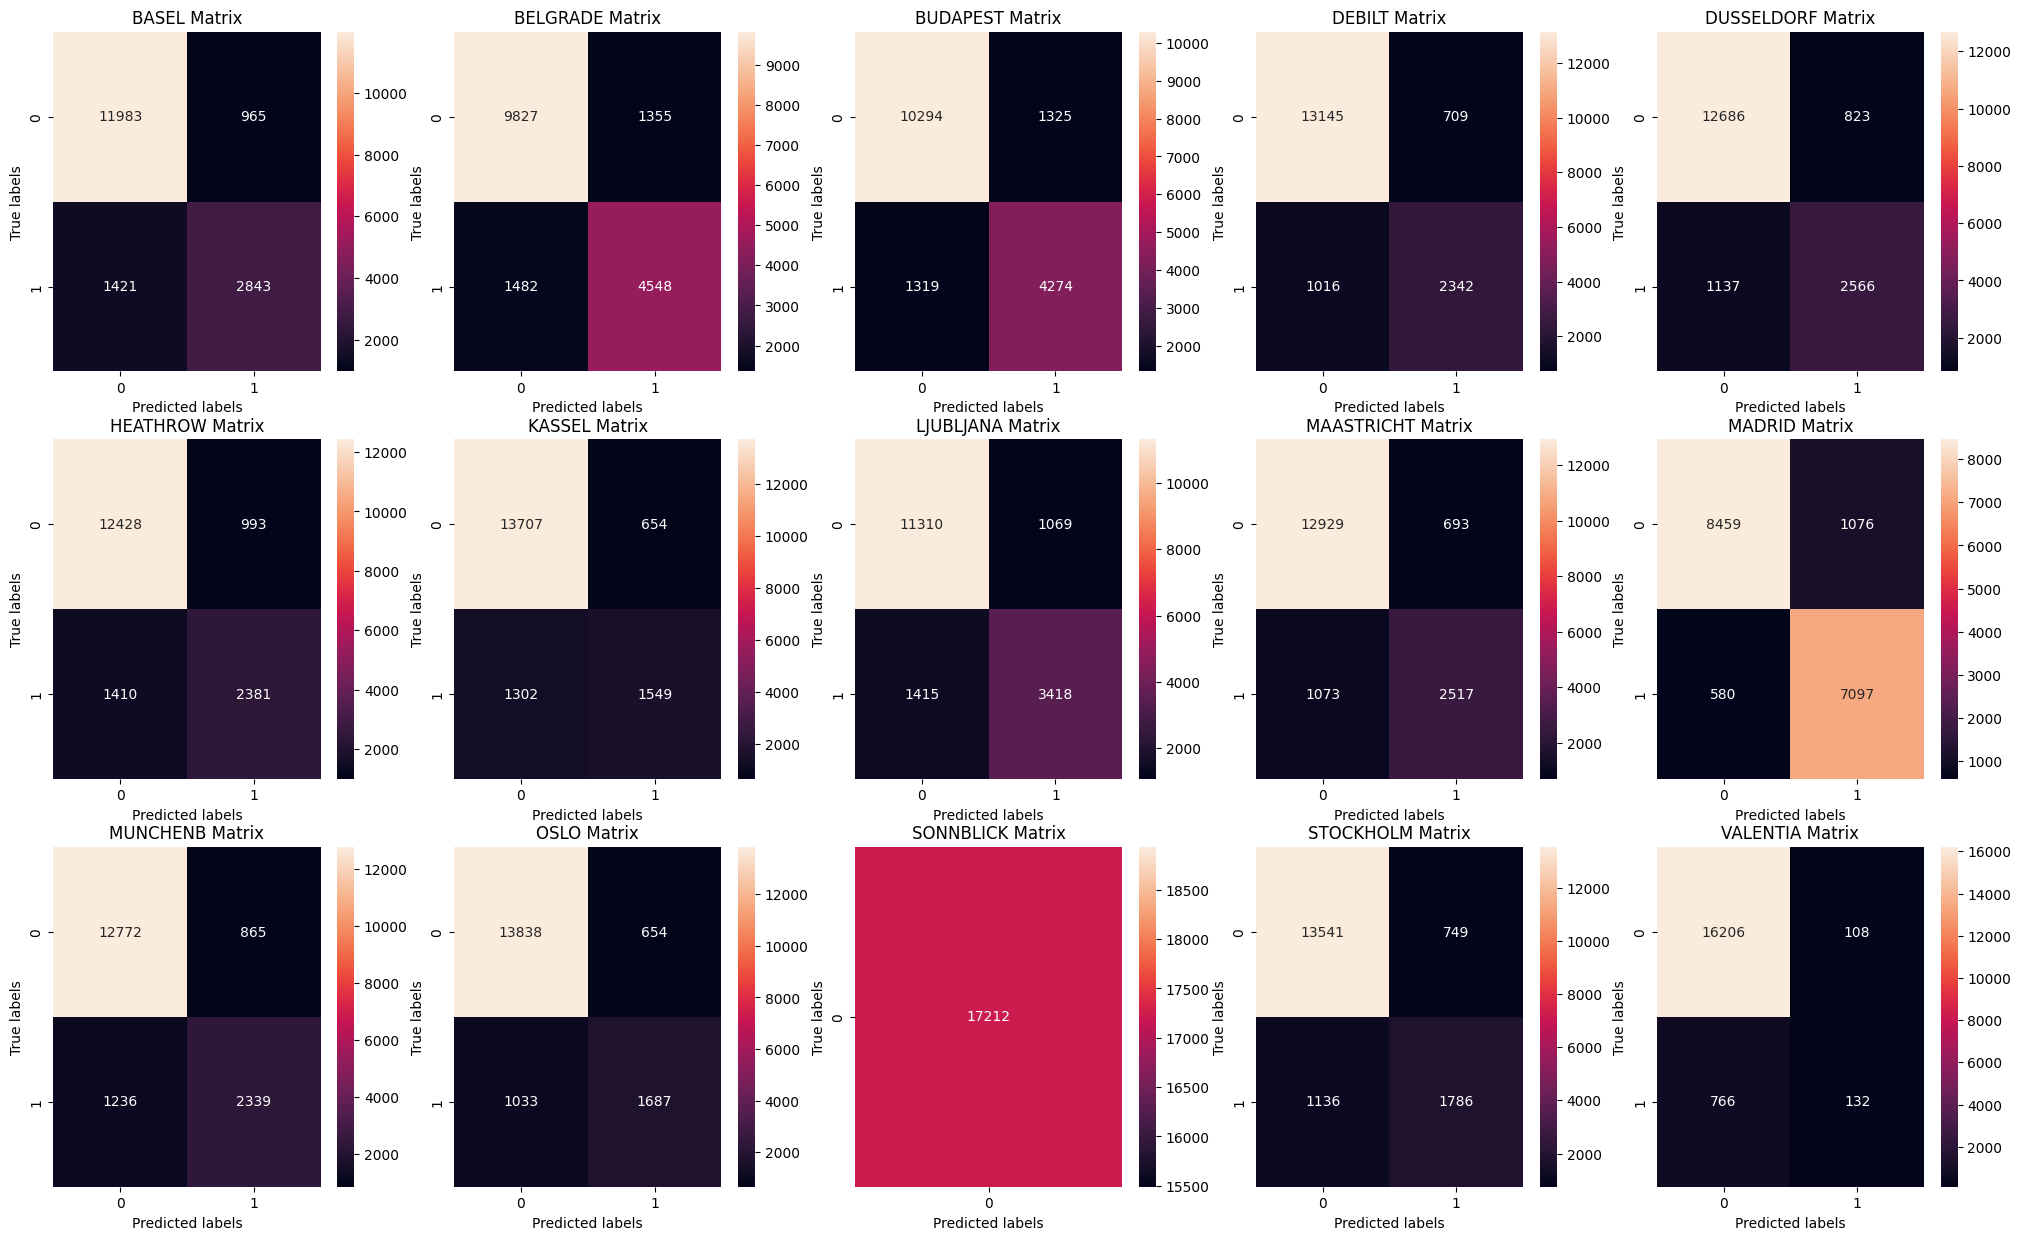

In [17]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
y_pred = mlp.predict(X_train)
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


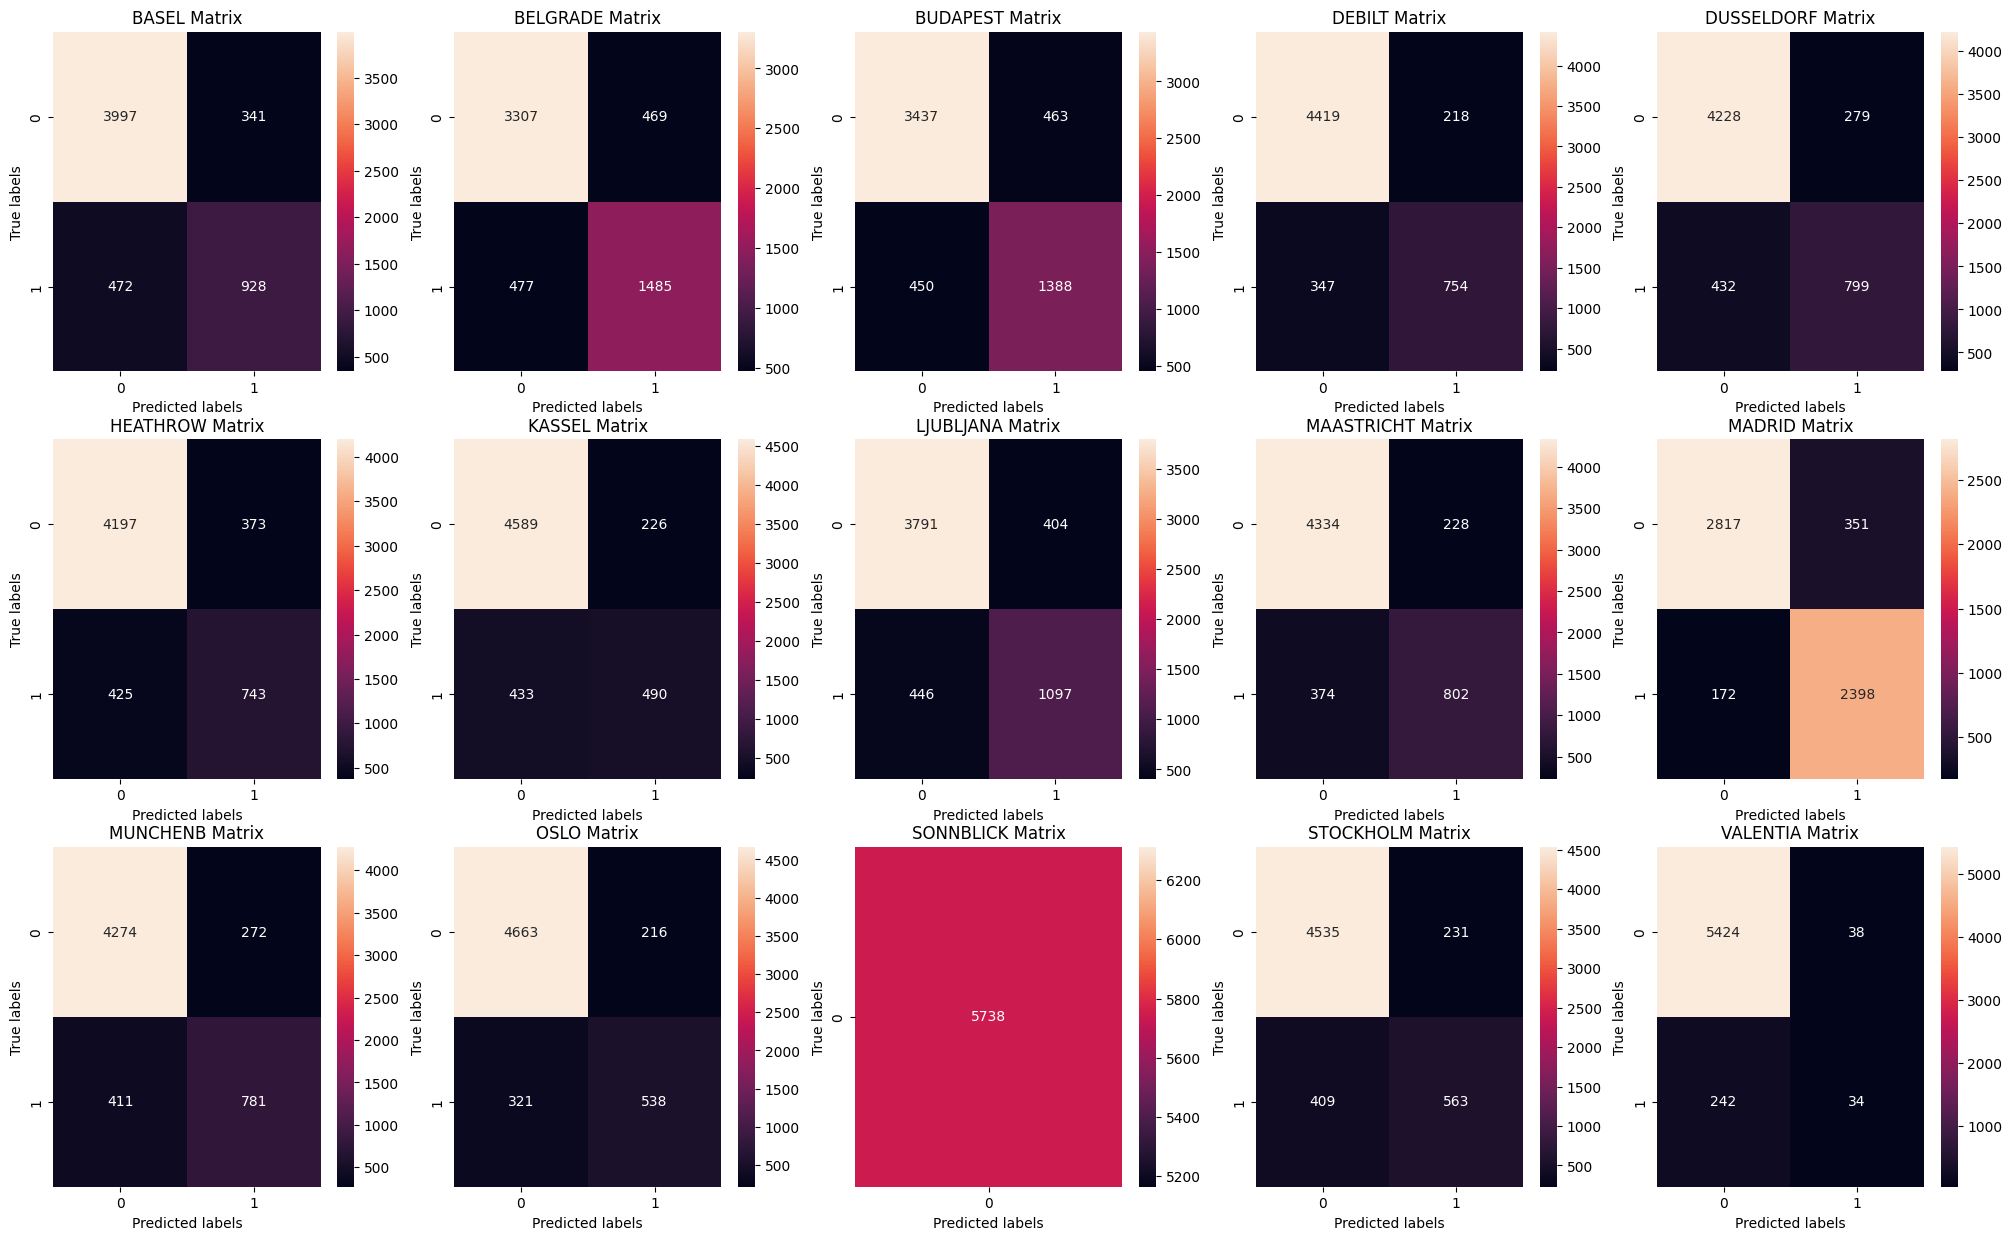

In [18]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
y_pred = mlp.predict(X_test)
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

##### Scenario 2

In [21]:
#run MLP Classifier | ANN
mlp = MLPClassifier(hidden_layer_sizes=(50, 10, 5), max_iter=1000, tol=0.005)
#Fit the data to the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [22]:
# Test the accuracy of the MLP model on training data using cross-validation
y_pred_train_mlp = mlp.predict(X_train)
print('MLP Train accuracy score: ', cross_val_score(mlp, X_train, y_train, cv=3, scoring='accuracy').mean())

# Test the accuracy of the MLP model on test data
y_pred_mlp = mlp.predict(X_test)
print('MLP Test accuracy score: ', accuracy_score(y_test, y_pred_mlp))

MLP Train accuracy score:  0.44509548201065163
MLP Test accuracy score:  0.47368421052631576


d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


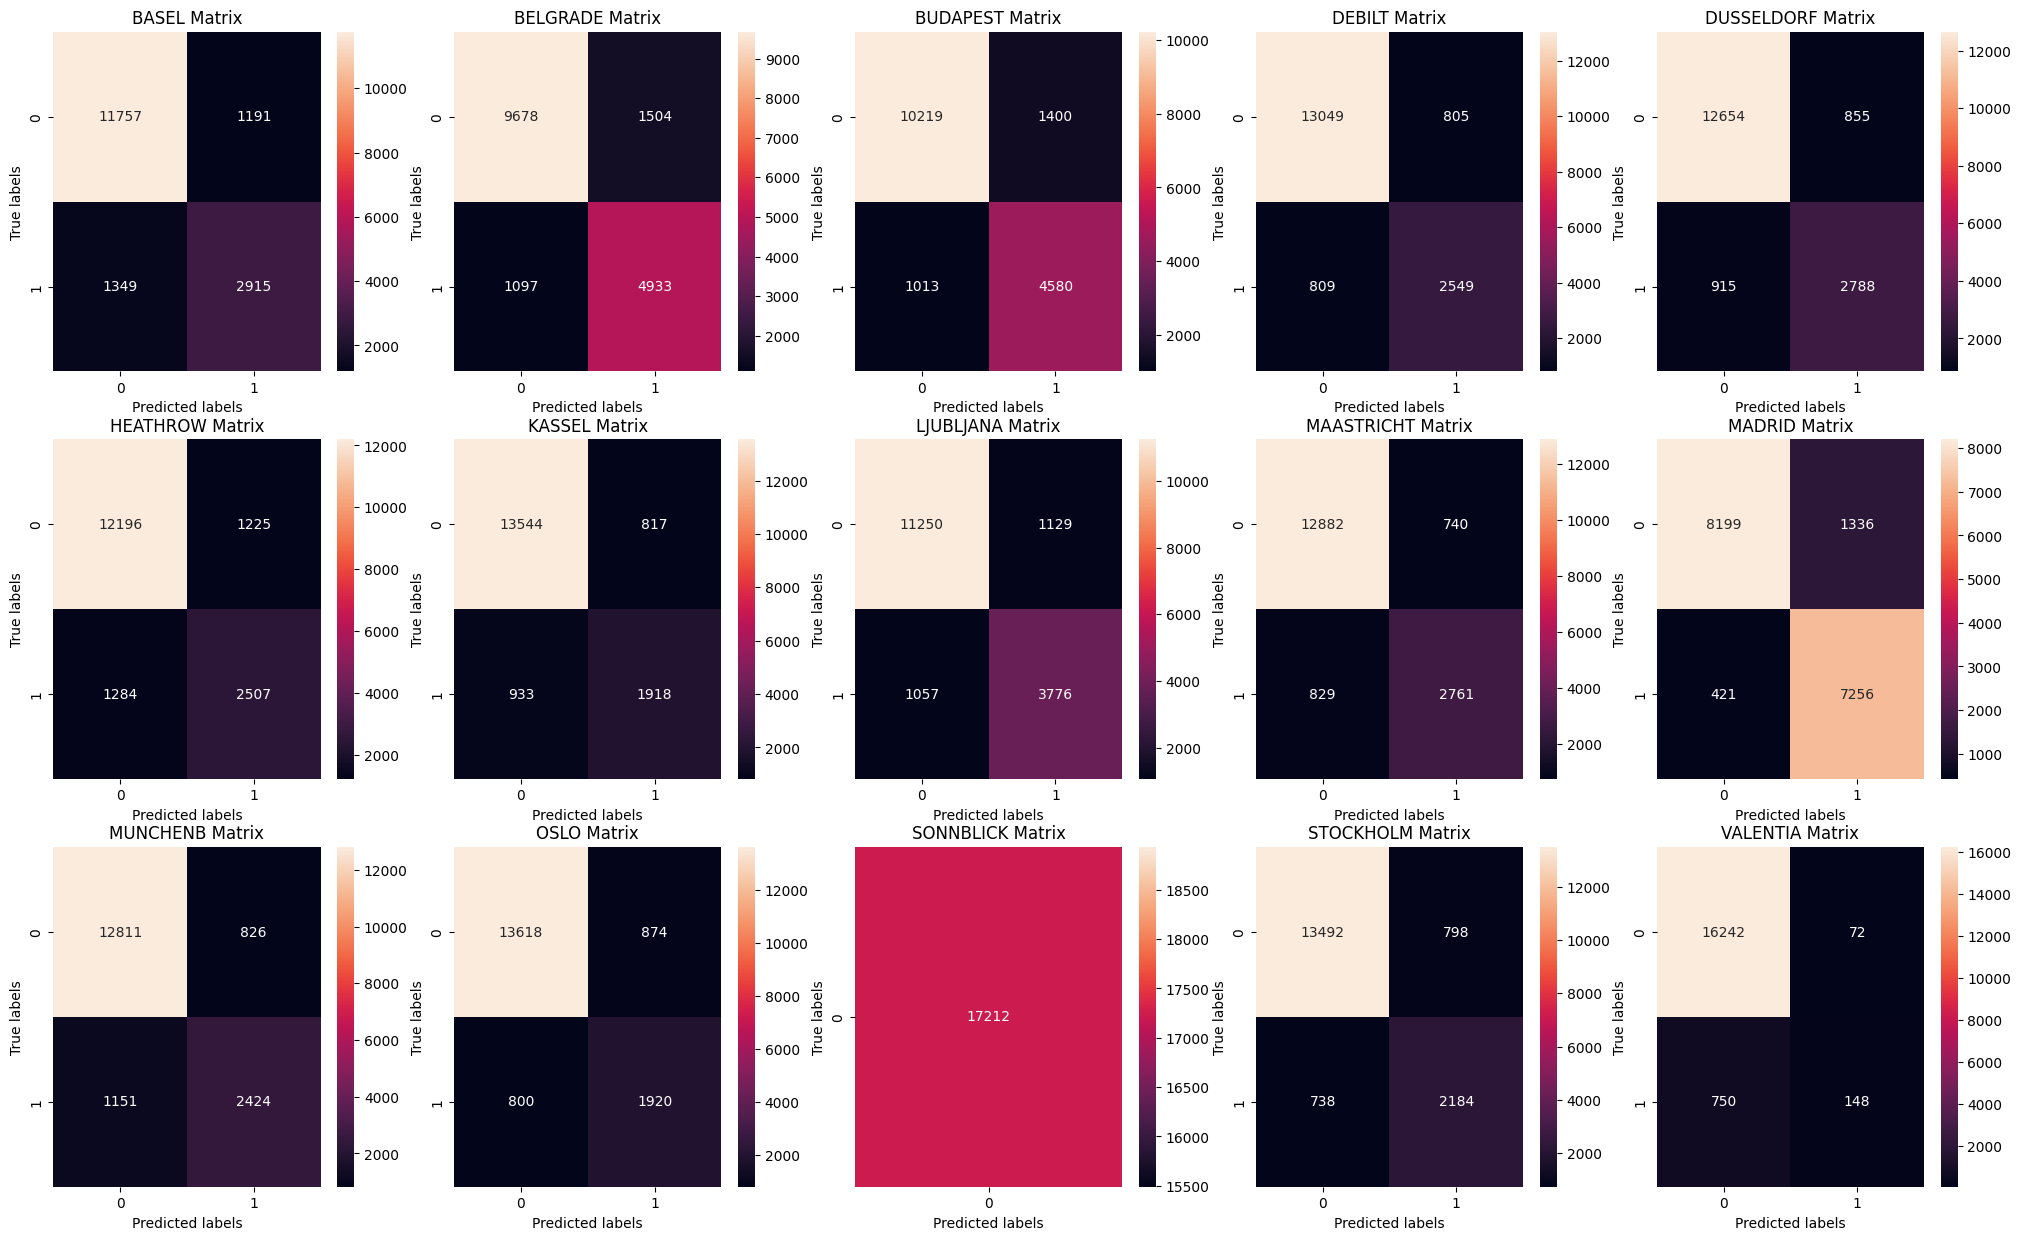

In [23]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
y_pred = mlp.predict(X_train)
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


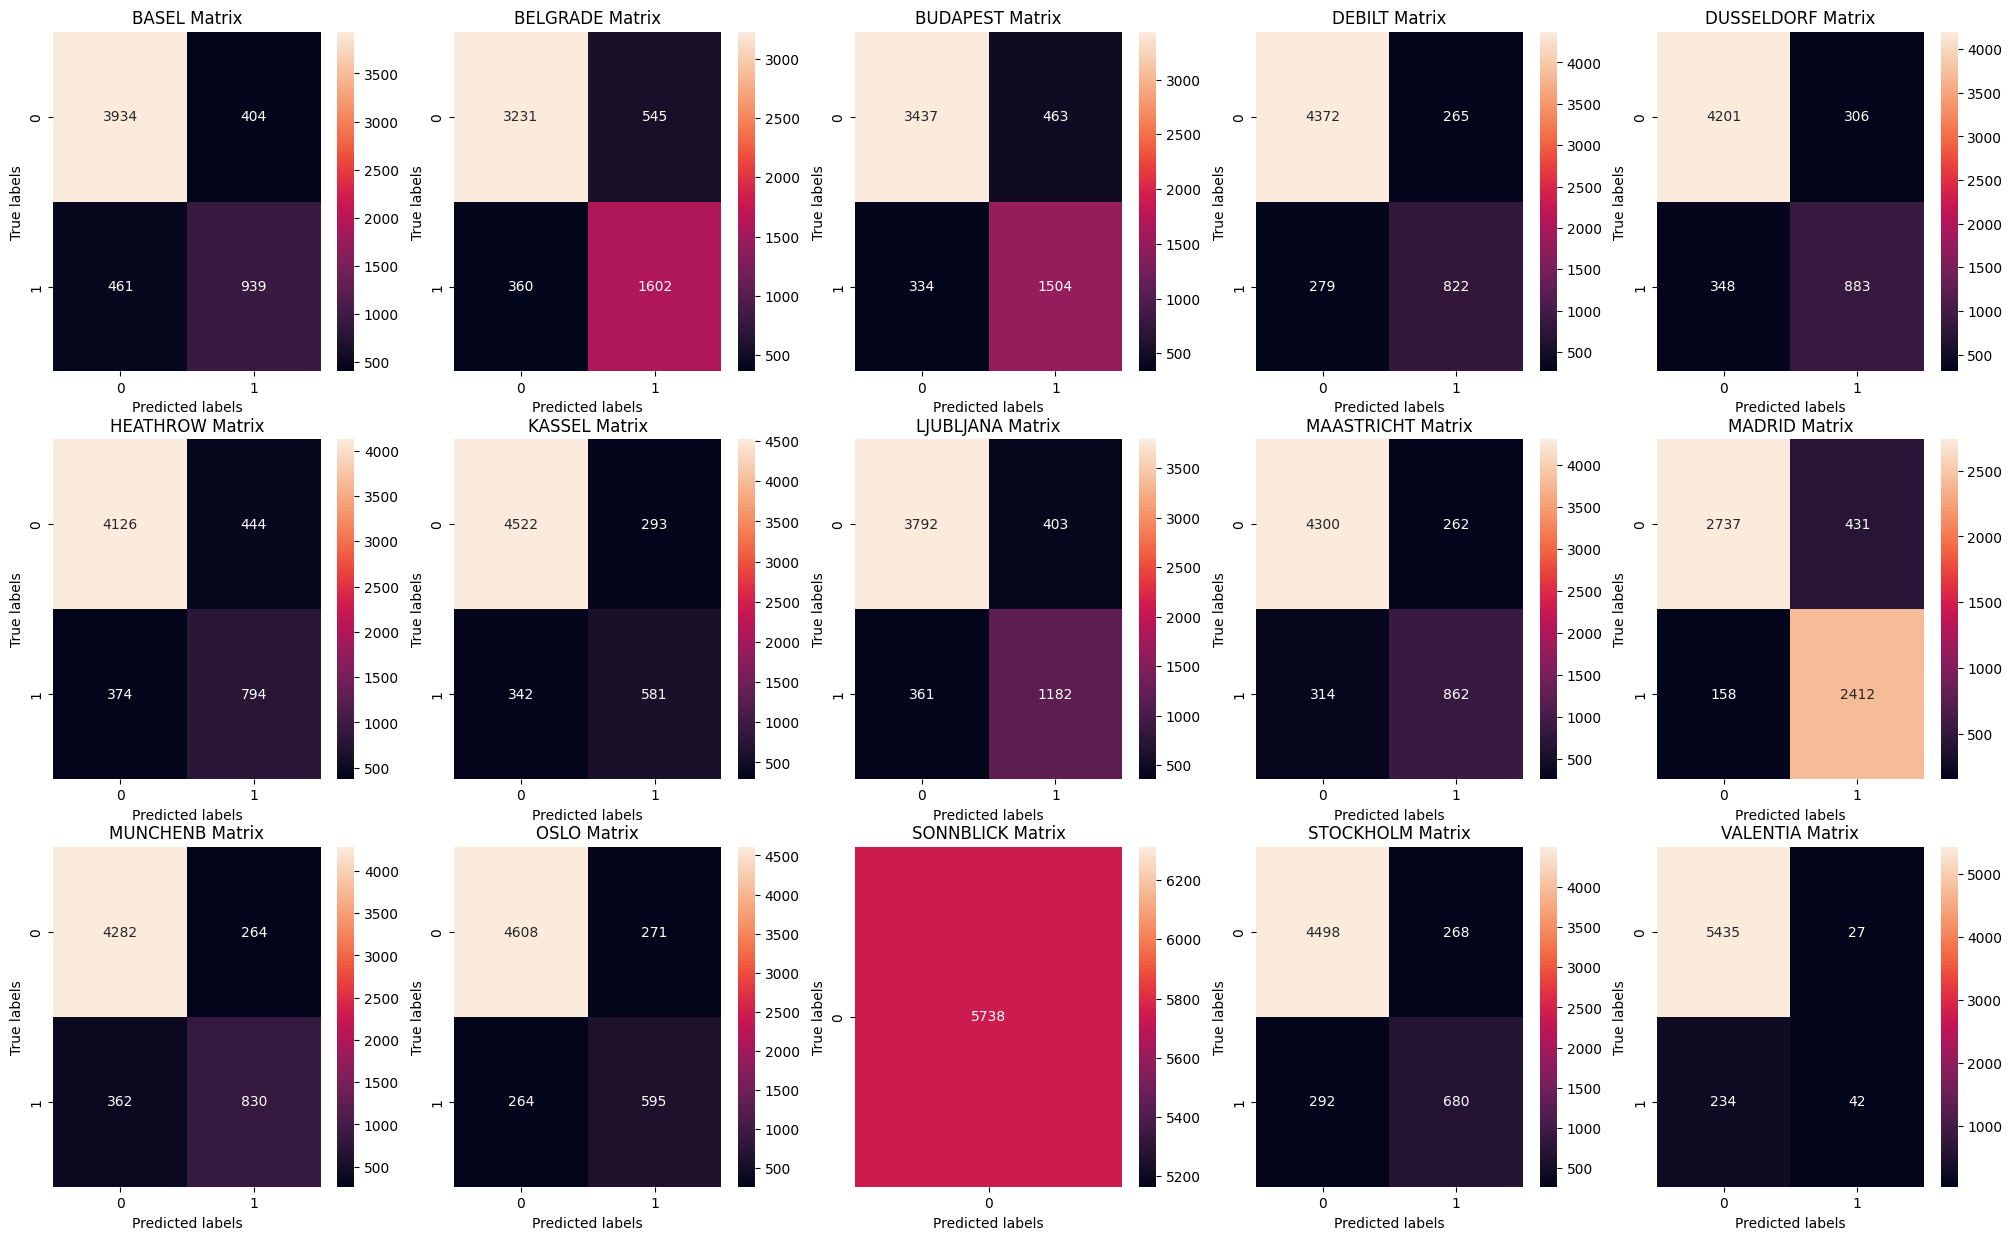

In [24]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
y_pred = mlp.predict(X_test)
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

##### Scenario 3

In [28]:
#run MLP Classifier | ANN
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, tol=0.05)
#Fit the data to the model
mlp.fit(X_train, y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [29]:
# Test the accuracy of the MLP model on training data using cross-validation
y_pred_train_mlp = mlp.predict(X_train)
print('MLP Train accuracy score: ', cross_val_score(mlp, X_train, y_train, cv=3, scoring='accuracy').mean())

# Test the accuracy of the MLP model on test data
y_pred_mlp = mlp.predict(X_test)
print('MLP Test accuracy score: ', accuracy_score(y_test, y_pred_mlp))

MLP Train accuracy score:  0.46345560005345665
MLP Test accuracy score:  0.4761240850470547


d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


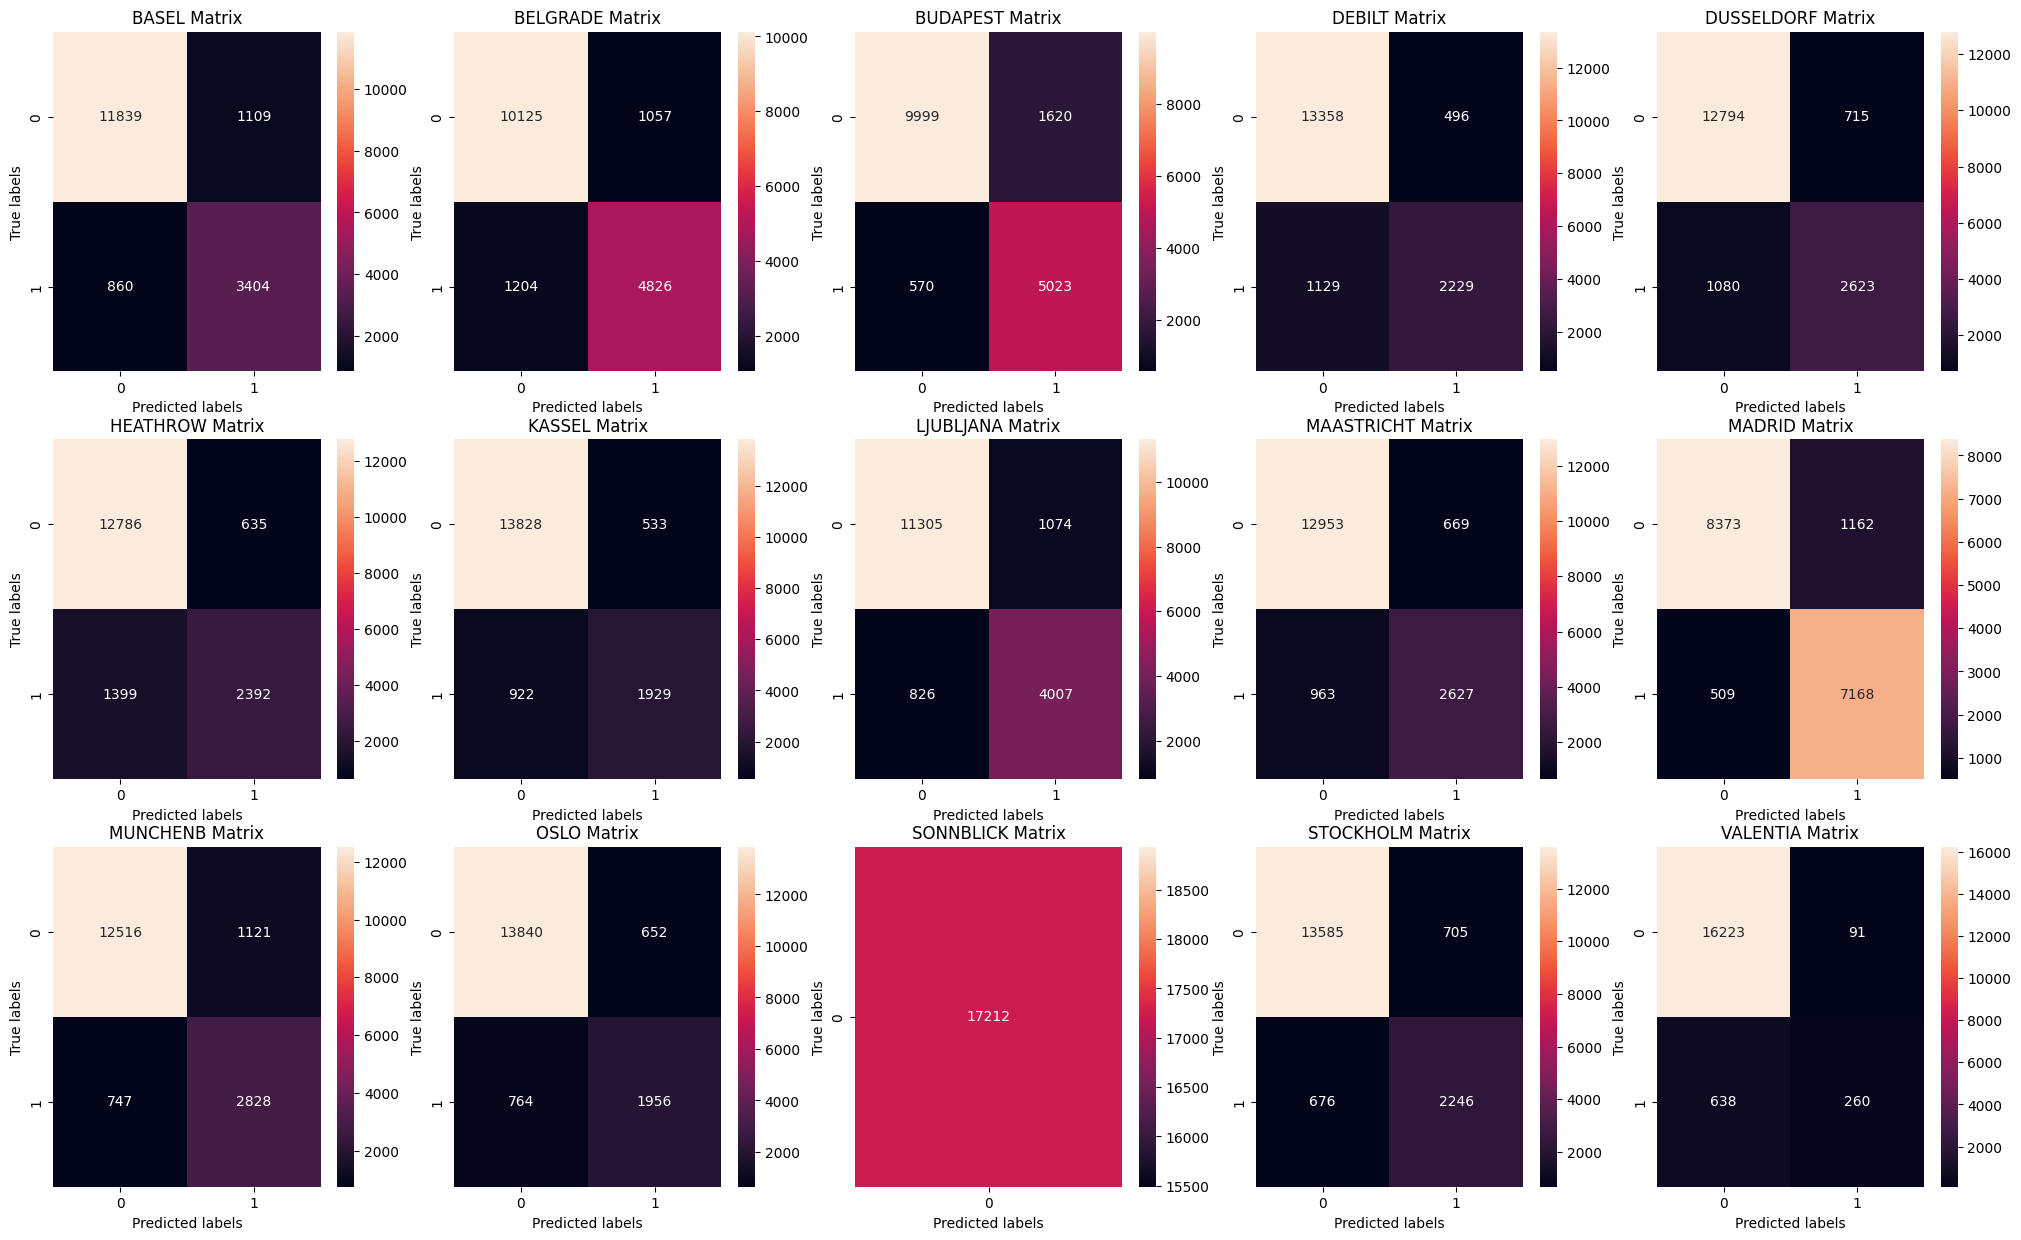

In [30]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
y_pred = mlp.predict(X_train)
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1

d:\Virtual Env\my_project_env_pc\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


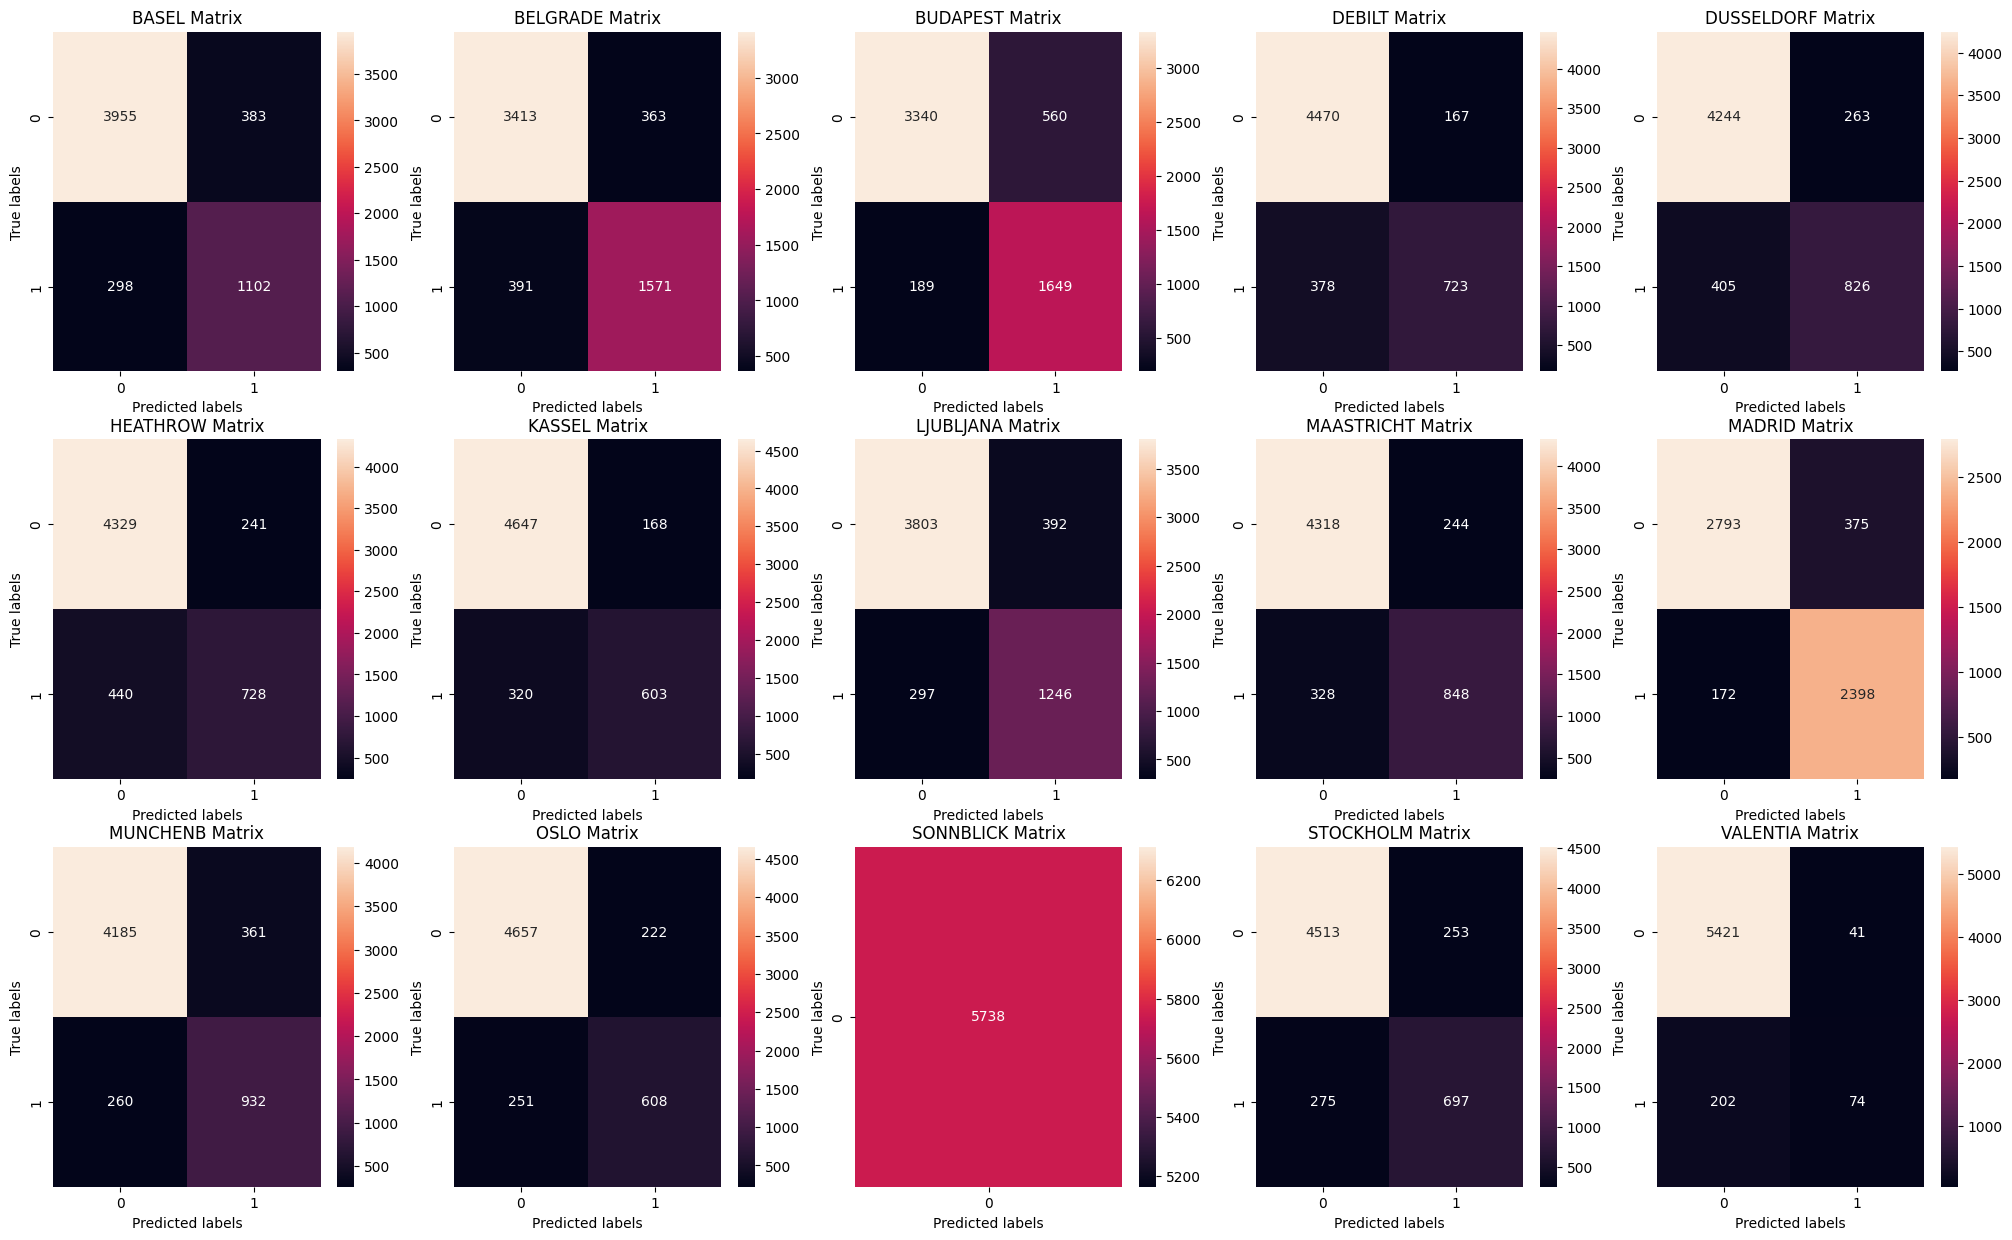

In [31]:
locations = list({x.split("_")[0] for x in climate.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

key = "_pleasant_weather"
y_pred = mlp.predict(X_test)
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1